In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import os, sys
import numpy as np
from numpy import ma
import pandas as pd
import xray
from scipy.signal import detrend

In [3]:
dset = xray.open_dataset('/Users/nicolasf/data/SST/ERSST/ersst.realtime.nc')

In [4]:
dset

<xray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 810, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 1948-02-15 1948-03-15 1948-04-15 ...
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
Data variables:
    sst      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    anom     (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    err      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    title: ERSST V3b in situ only
    history: Wed Aug  5 15:51:28 2015: /usr/local/bin/ncrcat -O ersst.194802_ft.nc ersst.194803_ft.nc ersst.194804_ft.nc ersst.194805_ft.nc ersst.194806_ft.nc ersst.194807_ft.nc ersst.194808_ft.nc ersst.194809_ft.nc ersst.194810_ft.nc ersst.194811_ft.nc ersst.194812_ft.nc ersst.194901_ft.nc ersst.194902_ft.nc ersst.194903_ft.nc ersst.194904_ft.nc erss

In [5]:
dset['lon']

<xray.DataArray 'lon' (lon: 180)>
array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,
         18.,   20.,   22.,   24.,   26.,   28.,   30.,   32.,   34.,
         36.,   38.,   40.,   42.,   44.,   46.,   48.,   50.,   52.,
         54.,   56.,   58.,   60.,   62.,   64.,   66.,   68.,   70.,
         72.,   74.,   76.,   78.,   80.,   82.,   84.,   86.,   88.,
         90.,   92.,   94.,   96.,   98.,  100.,  102.,  104.,  106.,
        108.,  110.,  112.,  114.,  116.,  118.,  120.,  122.,  124.,
        126.,  128.,  130.,  132.,  134.,  136.,  138.,  140.,  142.,
        144.,  146.,  148.,  150.,  152.,  154.,  156.,  158.,  160.,
        162.,  164.,  166.,  168.,  170.,  172.,  174.,  176.,  178.,
        180.,  182.,  184.,  186.,  188.,  190.,  192.,  194.,  196.,
        198.,  200.,  202.,  204.,  206.,  208.,  210.,  212.,  214.,
        216.,  218.,  220.,  222.,  224.,  226.,  228.,  230.,  232.,
        234.,  236.,  238.,  240.,  242.,  244.,  246., 

In [6]:
dset['lat']

<xray.DataArray 'lat' (lat: 89)>
array([-88., -86., -84., -82., -80., -78., -76., -74., -72., -70., -68.,
       -66., -64., -62., -60., -58., -56., -54., -52., -50., -48., -46.,
       -44., -42., -40., -38., -36., -34., -32., -30., -28., -26., -24.,
       -22., -20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,
         0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
Attributes:
    long_name: Latitude
    units: degrees_north
    grids: Uniform grid from -88 to 88 by 2

### selects 1972 - 2014 (same as VCSN)

In [7]:
dset = dset.sel(zlev=0, time=slice('1948','2014'))

In [8]:
lat = dset['lat'].data
lon = dset['lon'].data

In [9]:
lon

array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,
         18.,   20.,   22.,   24.,   26.,   28.,   30.,   32.,   34.,
         36.,   38.,   40.,   42.,   44.,   46.,   48.,   50.,   52.,
         54.,   56.,   58.,   60.,   62.,   64.,   66.,   68.,   70.,
         72.,   74.,   76.,   78.,   80.,   82.,   84.,   86.,   88.,
         90.,   92.,   94.,   96.,   98.,  100.,  102.,  104.,  106.,
        108.,  110.,  112.,  114.,  116.,  118.,  120.,  122.,  124.,
        126.,  128.,  130.,  132.,  134.,  136.,  138.,  140.,  142.,
        144.,  146.,  148.,  150.,  152.,  154.,  156.,  158.,  160.,
        162.,  164.,  166.,  168.,  170.,  172.,  174.,  176.,  178.,
        180.,  182.,  184.,  186.,  188.,  190.,  192.,  194.,  196.,
        198.,  200.,  202.,  204.,  206.,  208.,  210.,  212.,  214.,
        216.,  218.,  220.,  222.,  224.,  226.,  228.,  230.,  232.,
        234.,  236.,  238.,  240.,  242.,  244.,  246.,  248.,  250.,
        252.,  254.,

In [10]:
def get_mask(var):
    mat = var.data
    X = np.reshape(mat, (mat.shape[0],  mat.shape[1] * mat.shape[2]), order='F')
    X = ma.masked_array(X, np.isnan(X))
    mask = X.sum(0).mask
    mask = mask.reshape((mat.shape[1], mat.shape[2]), order='F')
    return mask

In [17]:
mask = get_mask(dset['sst'])

In [18]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [15]:
#mask = np.logical_not(mask)

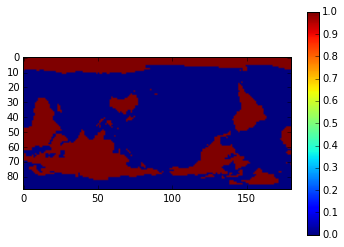

In [19]:
plt.imshow(mask); plt.colorbar()

In [27]:
mask = mask.astype(np.int)

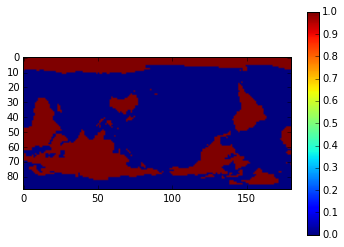

In [29]:
plt.imshow(mask); plt.colorbar()

In [28]:
mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
d = {}
d['time'] = ('time',dset['time'])
d['latitudes'] = ('latitudes',lat)
d['longitudes'] = ('longitudes', lon)
d['mask'] = (['latitudes','longitudes'], mask)
d['sst'] = (['time','latitudes','longitudes'], dset['sst'].data)

In [39]:
dset_out = xray.Dataset(d)

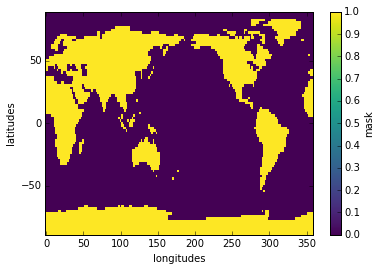

In [40]:
dset_out['mask'].plot(yincrease=True)

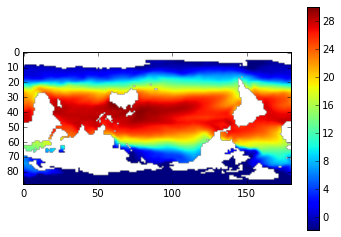

In [33]:
plt.imshow(dset_out['sst'][0,:,:]); plt.colorbar()

In [41]:
dset_out.to_netcdf('/Users/nicolasf/research/NIWA/paleo/pict/data/ERSST_monthly_SST_1948_2014.nc')

### calculates anomalies WRT to 1981 - 2010

In [ ]:
def demean(x): 
    return x - x.sel(time=slice('1981-1-1','2010-12-1')).mean('time')

In [ ]:
sst_anomalies = dset['sst'].groupby('time.month').apply(demean)

In [ ]:
def detrend_var(var): 
    """
    var must be a xray dataarray
    """
    mat = var.data
    X = np.reshape(mat, (mat.shape[0],  mat.shape[1] * mat.shape[2]), order='F')
    X = ma.masked_array(X, np.isnan(X))
    land = X.sum(0).mask
    ocean = -land
    Xocean = X[:,ocean]
    Xocean = detrend(Xocean, axis=0) + Xocean.mean(0)
    Xdetrend = np.ones(X.shape) * -999.
    Xdetrend[:,ocean] = Xocean
    Xdetrend = np.reshape(Xdetrend, mat.shape, order='F')
    Xdetrend = ma.masked_values(Xdetrend, -999.)
    mask = land.reshape((mat.shape[1], mat.shape[2]), order='F')
    return mask, Xdetrend

### detrend the raw values

In [ ]:
mask, sst_detrend = detrend_var(dset['sst'])

### detrend the anomalies

In [ ]:
mask, sst_anomalies_detrend = detrend_var(sst_anomalies)

In [ ]:
plt.imshow(sst_anomalies_detrend[0,:,:])

In [ ]:
plt.imshow(sst_detrend[-2,::-1,:], vmin=0, vmax=30)

In [ ]:
plt.plot(sst_detrend[:,50,100])
plt.plot(dset['sst'][:,50,100])

In [ ]:
plt.plot()

In [ ]:
detrend?

In [ ]:
X = np.reshape(mat, (mat.shape[0], len(lat) * len(lon)), order='F')

In [ ]:
X = ma.masked_array(X, np.isnan(X))

In [ ]:
land = X.sum(0).mask

In [ ]:
ocean = -land

In [ ]:
Xocean = X[:,ocean]

In [ ]:
Xocean.shape

In [ ]:
Xocean = detrend(Xocean, axis=0)

In [ ]:
Xdetrend = np.ones(X.shape) * -999.

In [ ]:
Xdetrend[:,ocean] = Xocean

In [ ]:
Xdetrend.shape

In [ ]:
X.shape

In [ ]:
Xdetrend = np.reshape(Xdetrend, mat.shape, order='F')

In [ ]:
Xdetrend = ma.masked_values(Xdetrend, -999.)

In [ ]:
plt.imshow(Xdetrend[0,::-1,:])

In [ ]:
mask = land.reshape((len(lat), len(lon)), order='F')

In [ ]:
d = {}
d['time'] = ('time',dset['time'])
d['lat'] = ('latitudes',lat)
d['lon'] = ('longitudes', lon)
d['mask'] = (['latitudes','longitudes'], mask)
d['sst'] = (['time','latitudes','longitudes'], dset['sst'].data)
d['sst_detrend'] = (['time','latitudes','longitudes'], dset['sst'].data)
d['sst_anomalies'] = (['time','latitudes','longitudes'], sst_anoms)
d['sst_anomalies_detrend'] = (['time','latitudes','longitudes'], sstd)



In [ ]:
dset_detrend = xray.Dataset(d)

In [ ]:
dset_detrend

In [ ]:
dset_detrend.to_netcdf('/Users/nicolasf/research/NIWA/paleo/pict/data/ERSST_anoms_Detrend_1979_2010.nc')

In [ ]:
sst_seas

In [ ]:
import bottleneck as bn

In [ ]:
bn.move_mean?

In [ ]:
m3 = bn.move_mean(dset_detrend['sstd'], 3, axis=0)
m6 = bn.move_mean(dset_detrend['sstd'], 6, axis=0)

In [ ]:
m3.shape

In [ ]:
dset_detrend

In [ ]:
plt.imshow(m6[5,::-1,:])